In [83]:
from pydub.playback import play
from pydub import AudioSegment
import array
import numpy as np

sound = AudioSegment.from_file("audio.ogg", "ogg")

play(sound)
sound


In [13]:
from pydub.utils import mediainfo

mediainfo('audio.ogg')

{'index': '0',
 'codec_name': 'opus',
 'codec_long_name': 'Opus (Opus Interactive Audio Codec)',
 'profile': 'unknown',
 'codec_type': 'audio',
 'codec_time_base': '1/48000',
 'codec_tag_string': '[0][0][0][0]',
 'codec_tag': '0x0000',
 'sample_fmt': 'fltp',
 'sample_rate': '48000',
 'channels': '1',
 'channel_layout': 'mono',
 'bits_per_sample': '0',
 'id': 'N/A',
 'r_frame_rate': '0/0',
 'avg_frame_rate': '0/0',
 'time_base': '1/48000',
 'start_pts': '104',
 'start_time': '0.002167',
 'duration_ts': '147944',
 'duration': '3.082167',
 'bit_rate': '16585',
 'max_bit_rate': 'N/A',
 'bits_per_raw_sample': 'N/A',
 'nb_frames': 'N/A',
 'nb_read_frames': 'N/A',
 'nb_read_packets': 'N/A',
 'DISPOSITION': {'default': '0',
  'dub': '0',
  'original': '0',
  'comment': '0',
  'lyrics': '0',
  'karaoke': '0',
  'forced': '0',
  'hearing_impaired': '0',
  'visual_impaired': '0',
  'clean_effects': '0',
  'attached_pic': '0',
  'timed_thumbnails': '0'},
 'filename': 'audio.ogg',
 'nb_streams': '1

In [91]:
import numpy as np

song = sound.get_array_of_samples()
song

shifted_samples_array = array.array(sound.array_type, song)
new_sound = sound._spawn(shifted_samples_array)
new_sound

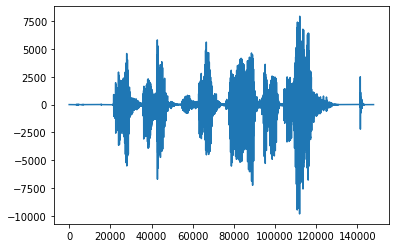

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(song)

In [17]:
from scipy.fftpack import fft

/home/josele639/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


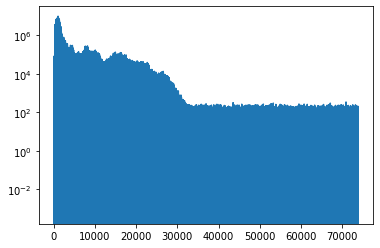

In [18]:
y = fft(song)

mod = y[0:len(y)//2]
plt.plot(mod)
plt.yscale('log')


/home/josele639/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


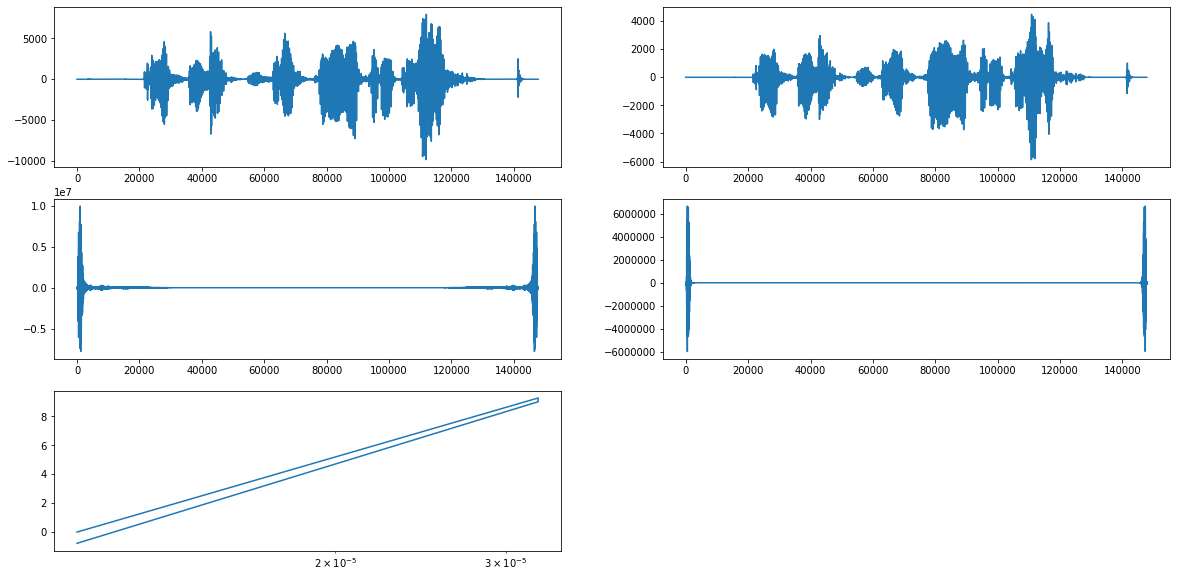

In [147]:
from scipy import signal

fm = 700
y = song

b, a = signal.butter(3,1/fm*10, 'low')


plt.figure(figsize=(20,10))
y_filtered = signal.filtfilt(b, a, y)
plt.subplot(3,2,1)
plt.plot(y)

plt.subplot(3,2,2)
plt.plot(y_filtered)


yF = fft(y)
yF1 = fft(y_filtered)

plt.subplot(3,2,3)
plt.plot(yF[0:len(yF//2)])

plt.subplot(3,2,4)
plt.plot(yF1[0:len(yF1//2)])

plt.subplot(3,2,5)
plt.semilogx(b, 20 * np.log10(abs(a)))



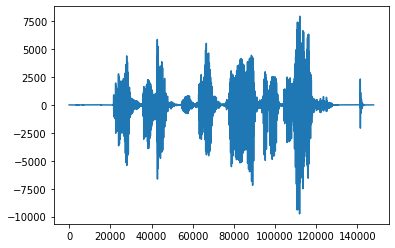

In [122]:
y_filter = np.array(y_filtered, dtype='int')

plt.plot(y_filter)

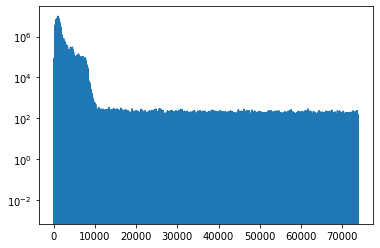

In [135]:
y = fft(y_filter)

mod = y[0:len(y)//2]
plt.plot(mod)
plt.yscale('log')

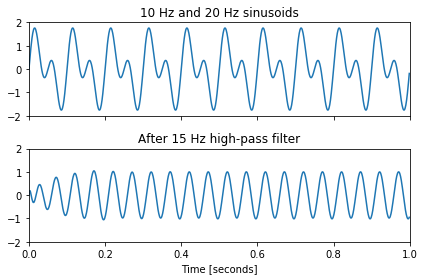

In [50]:
#Prueba para entender bien el funcionamiento.

t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [148]:
shifted_samples_array = array.array(sound.array_type, y_filter)

final_sound = sound._spawn(shifted_samples_array)

final_sound

/home/josele639/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


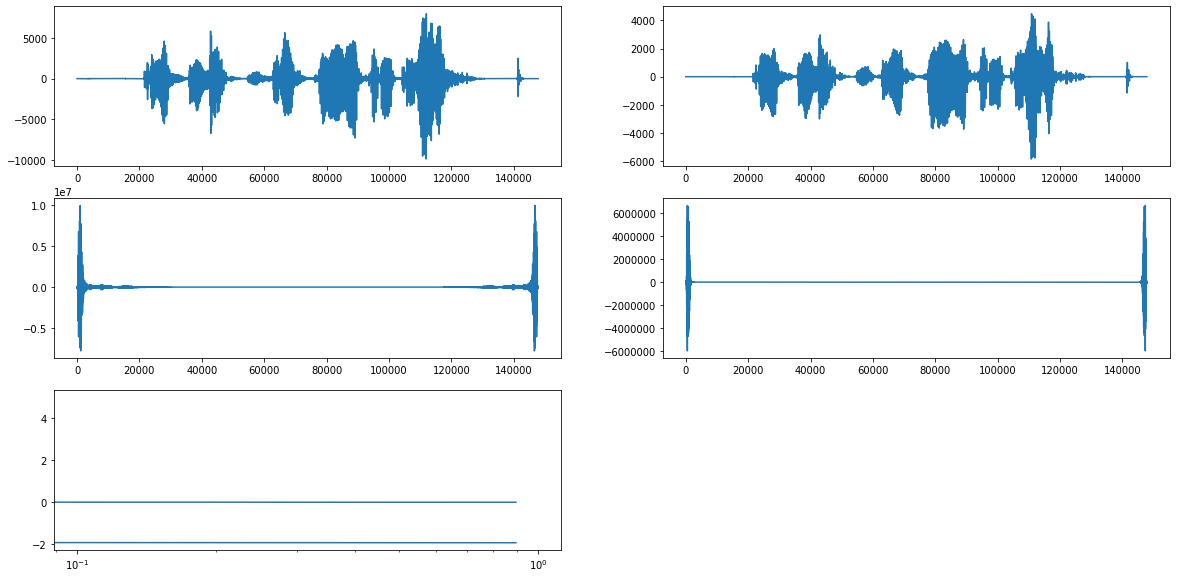

In [154]:
#filtro paso alto

fm = 200
y = song

b, a = signal.butter(2,1/fm*10, 'highpass')


plt.figure(figsize=(20,10))
y_filtered_hp = signal.filtfilt(b, a, y)
plt.subplot(3,2,1)
plt.plot(y)

plt.subplot(3,2,2)
plt.plot(y_filtered)


yF = fft(y)
yF1 = fft(y_filtered)

plt.subplot(3,2,3)
plt.plot(yF[0:len(yF//2)])

plt.subplot(3,2,4)
plt.plot(yF1[0:len(yF1//2)])

plt.subplot(3,2,5)
plt.semilogx(b, 20 * np.log10(abs(a)))



In [155]:
y_filter_hp = np.array(y_filtered, dtype='int')

shifted_samples_array = array.array(sound.array_type, y_filter_hp)

final_sound2 = sound._spawn(shifted_samples_array)

final_sound2